<h4>This is a case study which is to predict the severity of an accident. It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. As you keep driving, police car start appearing from afar shutting down the highway. Oh, it is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to be happening. Now, wouldn't it be great if there is something in place that could warn you, given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to.</h4>

In [112]:
import pandas as pd
import numpy as np

print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [113]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

C:\Users\Howard\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [114]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [115]:
df.shape

(194673, 38)

In [116]:
clean_df = df[['ADDRTYPE','EXCEPTRSNDESC','EXCEPTRSNCODE','SDOT_COLCODE','SDOT_COLDESC','SEVERITYCODE','WEATHER','SPEEDING','ROADCOND','LIGHTCOND','JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT']]

#1. remove records with EXCEPTRSNDESC - Not Enough Information, or Insufficient Location Information - such records only accounted 1% of the data and not useful for analysis
print("Before remove EXCEPTRSNDESC=NEI",clean_df.shape)
clean_df = clean_df.set_index("EXCEPTRSNCODE")
clean_df = clean_df.drop("NEI", axis=0)
clean_df = clean_df.reset_index("EXCEPTRSNCODE")
print("After remove EXCEPTRSNDESC=NEI",clean_df.shape)


#2. remove records with SDOT_COLCODE - NOT ENOUGH INFORMATION / NOT APPLICABLE - such records only accounted 2% of the data after the first cleaning and not useful for analysis
print("Before remove SDOT_COLCODE=0",clean_df.shape)
clean_df = clean_df.set_index("SDOT_COLCODE")
clean_df = clean_df.drop(0, axis=0)
clean_df = clean_df.reset_index("SDOT_COLCODE")
print("Before remove SDOT_COLCODE=0",clean_df.shape)

#3. fill blank cell to N
clean_df['SPEEDING'] .fillna("N", inplace = True) 
clean_df['JUNCTIONTYPE'] .fillna("BLANK", inplace = True) 
clean_df['ADDRTYPE'] .fillna("BLANK", inplace = True)
clean_df['WEATHER'] .fillna("BLANK", inplace = True)

#5. default Null  values based on  groupby count
clean_df['LIGHTCOND'] .fillna("Daylight", inplace = True)
clean_df['ROADCOND'] .fillna("Dry", inplace = True)

#4. remove records with NULL Junctiontype
print("Before remove Junctiontype=BLANK",clean_df.shape)
clean_df = clean_df.set_index("JUNCTIONTYPE")
clean_df = clean_df.drop('BLANK', axis=0)
clean_df = clean_df.reset_index("JUNCTIONTYPE")
print("After remove JUNCTIONTYPE=BLANK",clean_df.shape)
clean_df = clean_df.set_index("ADDRTYPE")
clean_df = clean_df.drop('BLANK', axis=0)
clean_df = clean_df.reset_index("ADDRTYPE")
clean_df = clean_df.set_index("WEATHER")
clean_df = clean_df.drop('BLANK', axis=0)
clean_df = clean_df.reset_index("WEATHER")

Before remove EXCEPTRSNDESC=NEI (194673, 13)
After remove EXCEPTRSNDESC=NEI (189035, 13)
Before remove SDOT_COLCODE=0 (189035, 13)
Before remove SDOT_COLCODE=0 (183805, 13)
Before remove Junctiontype=BLANK (183805, 13)
After remove JUNCTIONTYPE=BLANK (183633, 13)


In [117]:

clean_df["ADDRTYPE"] = clean_df["ADDRTYPE"].astype('category')
clean_df["WEATHER"] = clean_df["WEATHER"].astype('category')
clean_df["SPEEDING"] = clean_df["SPEEDING"].astype('category')
clean_df["ROADCOND"] = clean_df["ROADCOND"].astype('category')
clean_df["LIGHTCOND"] = clean_df["LIGHTCOND"].astype('category')
clean_df["JUNCTIONTYPE"] = clean_df["JUNCTIONTYPE"].astype('category')
clean_df.dtypes

clean_df["ADDRTYPE_CAT"] = clean_df["ADDRTYPE"].cat.codes
clean_df["WEATHER_CAT"] = clean_df["WEATHER"].cat.codes
clean_df["SPEEDING_CAT"] = clean_df["SPEEDING"].cat.codes
clean_df["ROADCOND_CAT"] = clean_df["ROADCOND"].cat.codes
clean_df["LIGHTCOND_CAT"] = clean_df["LIGHTCOND"].cat.codes
clean_df["JUNCTIONTYPE_CAT"] = clean_df["JUNCTIONTYPE"].cat.codes
clean_df.head()

,WEATHER,ADDRTYPE,JUNCTIONTYPE,SDOT_COLCODE,EXCEPTRSNCODE,EXCEPTRSNDESC,SDOT_COLDESC,SEVERITYCODE,SPEEDING,ROADCOND,LIGHTCOND,PERSONCOUNT,VEHCOUNT,ADDRTYPE_CAT,WEATHER_CAT,SPEEDING_CAT,ROADCOND_CAT,LIGHTCOND_CAT,JUNCTIONTYPE_CAT
0,Overcast,Intersection,At Intersection (intersection related),11,,NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",2,N,Wet,Daylight,2,2,2,4,0,8,5,1
1,Raining,Block,Mid-Block (not related to intersection),16,NaN,NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",1,N,Wet,Dark - Street Lights On,2,2,1,6,0,8,2,4
2,Overcast,Block,Mid-Block (not related to intersection),14,NaN,NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",1,N,Dry,Daylight,4,3,1,4,0,0,5,4
3,Clear,Block,Mid-Block (not related to intersection),11,,NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1,N,Dry,Daylight,3,3,1,1,0,0,5,4
4,Raining,Intersection,At Intersection (intersection related),11,NaN,NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",2,N,Wet,Daylight,2,2,2,6,0,8,5,1


In [121]:
#Exploratory Data Analysis
print (pd.crosstab(clean_df['WEATHER'],clean_df['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(clean_df['ADDRTYPE'],clean_df['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(clean_df['LIGHTCOND'],clean_df['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(clean_df['ROADCOND'],clean_df['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(clean_df['SPEEDING'],clean_df['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(clean_df['JUNCTIONTYPE'],clean_df['SEVERITYCODE'],normalize='index'))


SEVERITYCODE                     1         2
WEATHER                                     
Blowing Sand/Dirt         0.717391  0.282609
Clear                     0.671791  0.328209
Fog/Smog/Smoke            0.663024  0.336976
Other                     0.846485  0.153515
Overcast                  0.679597  0.320403
Partly Cloudy             0.400000  0.600000
Raining                   0.659550  0.340450
Severe Crosswind          0.720000  0.280000
Sleet/Hail/Freezing Rain  0.754545  0.245455
Snowing                   0.805075  0.194925
Unknown                   0.924915  0.075085
SEVERITYCODE         1         2
ADDRTYPE                        
Alley         0.854015  0.145985
Block         0.749998  0.250002
Intersection  0.566111  0.433889
SEVERITYCODE                     1         2
LIGHTCOND                                   
Dark - No Street Lights   0.775000  0.225000
Dark - Street Lights Off  0.725991  0.274009
Dark - Street Lights On   0.696170  0.303830
Dark - Unknown Lighting  

In [88]:
X = clean_df[['ADDRTYPE','WEATHER', 'SPEEDING', 'ROADCOND', 'LIGHTCOND', 'JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT']].values



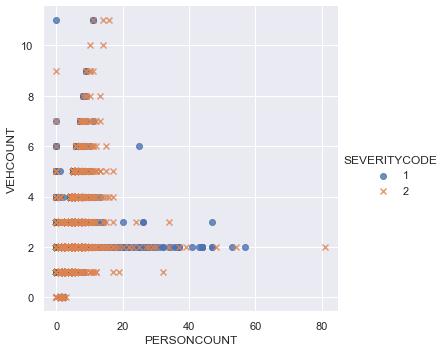

In [111]:
import seaborn as sns

sns.lmplot( x="PERSONCOUNT", y="VEHCOUNT", data=clean_df, fit_reg=False, hue='SEVERITYCODE',markers=["o", "x", ])
#OUTLIER INDENTIFIED AND TO BE REMOVED

In [ ]:
import seaborn as sns

sns.lmplot( x="PERSONCOUNT", y="VEHCOUNT", data=clean_df, fit_reg=False, hue='SEVERITYCODE')

In [9]:
#normalize the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

y = np.asarray(clean_df['SEVERITYCODE'])
y [0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (143573, 8) (143573,)
Test set: (35894, 8) (35894,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [13]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.60954102, 0.39045898],
       [0.7425079 , 0.2574921 ],
       [0.72435457, 0.27564543],
       ...,
       [0.76537594, 0.23462406],
       [0.61099027, 0.38900973],
       [0.55610619, 0.44389381]])

In [74]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.6858968695703389